In [ ]:
from google.colab import drive
import csv
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Path to the dataset and mapping files
dataset_path = "/Datasets/data.csv"
mapping = "/Datasets/mapping.csv"

In [ ]:
# Print out the column name
with open(dataset_path) as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    print(headers)

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [ ]:
# print out the first 5 rows of the dataset
with open(dataset_path) as csv_file:
    csv_reader = csv.reader(csv_file)
    for i, row in enumerate(csv_reader):
        if i >= 5:
            break
        print(row)
    print("\n\n")




['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
['2278392', '8222157', 'Caucasian', 'Female', '[0-10)', '?', '6', '25', '1', '1', '?', 'Pediatrics-Endocrinology', '41', '0', '1', '0', '0', '0', '250.83', '?', '?', '1', 'None', 'No

DATA VIZUALISATION

In [ ]:
# load dataset
dataset = pd.read_csv(dataset_path)
print(dataset.head(),dataset.count())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

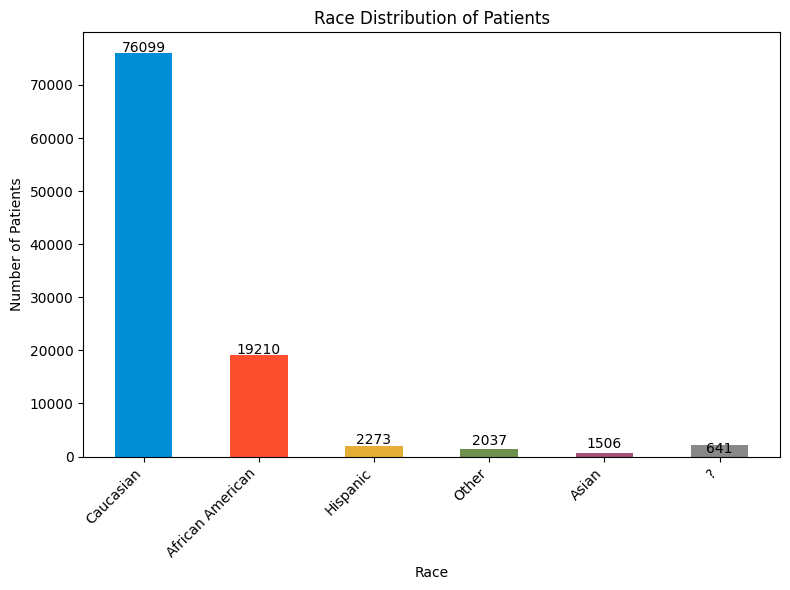

In [ ]:
race_counts = dataset['race'].value_counts()
caucasian_count = race_counts['Caucasian']
african_American_count = race_counts['AfricanAmerican']
hispanic_count = race_counts['Hispanic']
other_count = race_counts['Other']
asian_count = race_counts['Asian']
notKnow_count = race_counts['?']

# Create a bar chart of the race distribution
labels = ['Caucasian', 'African American', 'Hispanic', 'Other', 'Asian', '?']
sizes = [caucasian_count, african_American_count, hispanic_count, other_count, asian_count, notKnow_count]
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#a64d79', '#888888']

plt.figure(figsize=(8,6))
plt.bar(labels, sizes, color=colors, width=0.5)
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.title('Race Distribution of Patients')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(race_counts):
    plt.text(i, v + 80, str(v), ha='center')
plt.tight_layout()
plt.show()








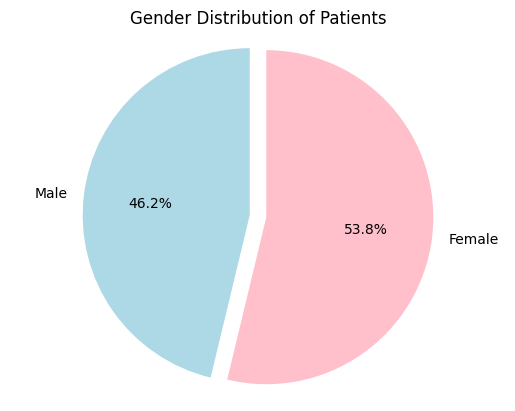

In [ ]:
# Calculate the number and percentage of male and female patients
gender_counts = dataset['gender'].value_counts()
male_count = gender_counts['Male']
female_count = gender_counts['Female']
total_count = male_count + female_count
male_percent = male_count / total_count * 100
female_percent = female_count / total_count * 100

# Create a pie chart of the gender distribution
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['#ADD8E6', '#FFC0CB']
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Gender Distribution of Patients')
plt.show()

<ipython-input-100-2774a640274b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['age_range'] = male_data['age'].apply(lambda x: int(x.split('-')[0][1:]))


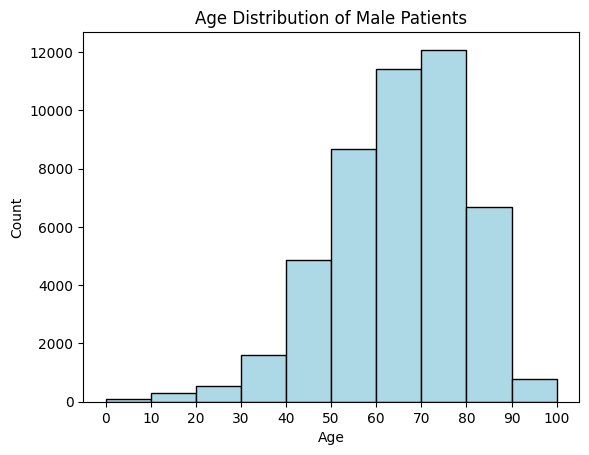

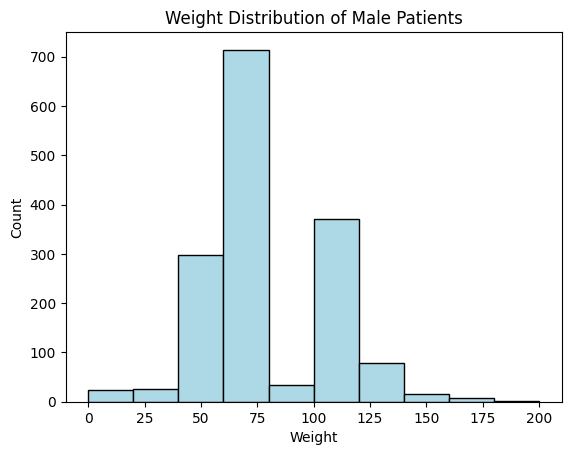

In [ ]:
# Create a histogram of males patient

# Filter the dataset to include only male patients
male_data = dataset.loc[dataset['gender'] == 'Male']

# Extract the age range from the age column and convert to integer
male_data['age_range'] = male_data['age'].apply(lambda x: int(x.split('-')[0][1:]))

# Create a histogram of patient ages for male patients
plt.hist(male_data['age_range'], color='#ADD8E6', bins=range(0, 110, 10), edgecolor='black')
plt.xticks(range(0, 110, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Male Patients')
plt.show()


# Replace weight range notation with average weight
dataset['weight'] = dataset['weight'].replace('[\?]', np.nan, regex=True)  # replace '?' with NaN
dataset['weight'] = dataset['weight'].replace('[\(\[](.*)[\)\]]', '\\1', regex=True)  # extract numerical values
dataset['weight'] = dataset['weight'].replace('\>', '', regex=True)  # remove '>' symbol
dataset['weight'] = dataset['weight'].replace('\<', '', regex=True)  # remove '<' symbol
dataset['weight'] = dataset['weight'].apply(lambda x: float(x.split('-')[0]) if '-' in str(x) else x)  # handle weight ranges
dataset['weight'] = dataset['weight'].astype(float)

# Calculate weight average for each patient
weight_avg = dataset.groupby('patient_nbr')['weight'].mean().reset_index(name='weight_avg')

# Merge weight_avg with male_data
male_data_weight = pd.merge(male_data, weight_avg, on='patient_nbr')

# Create a histogram of the weight distribution for male patients
plt.hist(male_data_weight['weight_avg'].dropna(), color='#ADD8E6', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Distribution of Male Patients')
plt.show()


<ipython-input-101-735b0968eca9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['age_range'] = female_data['age'].apply(lambda x: int(x.split('-')[0][1:]))


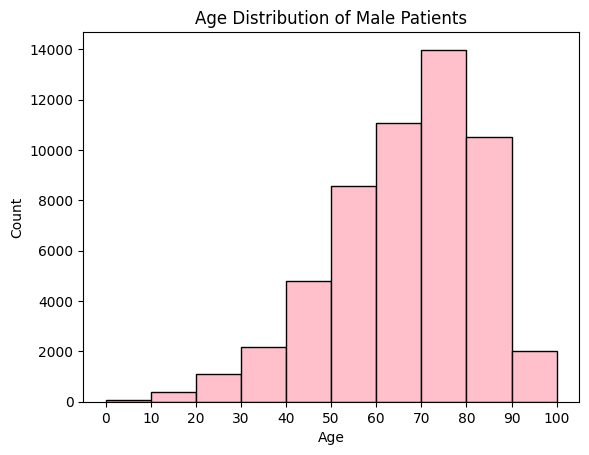

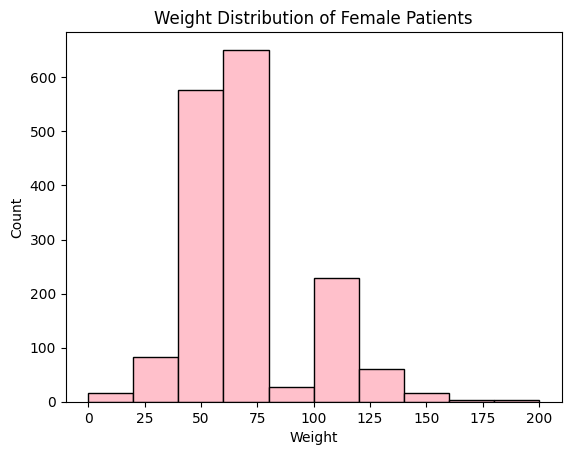

In [ ]:
# Create a histogram of feamles patient

# Filter the dataset to include only female patients
female_data = dataset.loc[dataset['gender'] == 'Female']

# Extract the age range from the age column and convert to integer
female_data['age_range'] = female_data['age'].apply(lambda x: int(x.split('-')[0][1:]))

# Create a histogram of patient ages for male patients
plt.hist(female_data['age_range'], color='#FFC0CB', bins=range(0, 110, 10), edgecolor='black')
plt.xticks(range(0, 110, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Male Patients')
plt.show()


# Replace weight range notation with average weight
dataset['weight'] = dataset['weight'].replace('[\?]', np.nan, regex=True)  # replace '?' with NaN
dataset['weight'] = dataset['weight'].replace('[\(\[](.*)[\)\]]', '\\1', regex=True)  # extract numerical values
dataset['weight'] = dataset['weight'].replace('\>', '', regex=True)  # remove '>' symbol
dataset['weight'] = dataset['weight'].replace('\<', '', regex=True)  # remove '<' symbol
dataset['weight'] = dataset['weight'].apply(lambda x: float(x.split('-')[0]) if '-' in str(x) else x)  # handle weight ranges
dataset['weight'] = dataset['weight'].astype(float)

# Calculate weight average for each patient
weight_avg = dataset.groupby('patient_nbr')['weight'].mean().reset_index(name='weight_avg')

# Merge weight_avg with male_data
female_data_weight = pd.merge(female_data, weight_avg, on='patient_nbr')

# Create a histogram of the weight distribution for male patients
plt.hist(female_data_weight['weight_avg'].dropna(), color='#FFC0CB', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Distribution of Female Patients')
plt.show()


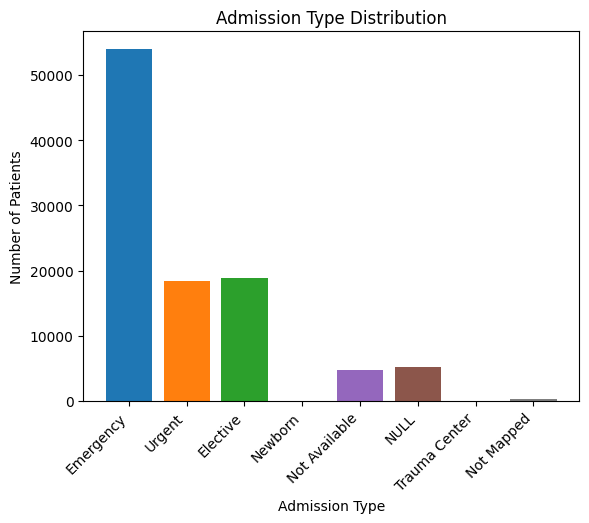



Exact number:
Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64


In [ ]:
# Count the number of patients in each admission type
admission_counts = dataset.groupby('admission_type_id')['gender'].count()

# Create a bar chart
plt.bar(admission_counts.index, admission_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.xticks(admission_counts.index, ['Emergency', 'Urgent', 'Elective', 'Newborn', 'Not Available', 'NULL', 'Trauma Center', 'Not Mapped'], rotation=45, ha='right')
plt.xlabel('Admission Type')
plt.ylabel('Number of Patients')
plt.title('Admission Type Distribution')
plt.show()

print("\n\nExact number:")
# Define the dictionary mapping admission type id to its meaning
admission_type_dict = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

# Replace admission type id with their meanings
dataset['admission_type_id'] = dataset['admission_type_id'].replace(admission_type_dict)

# Count the number of patients per admission type and print it out
patient_counts = dataset['admission_type_id'].value_counts()
print(patient_counts)





Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
NULL                                                                                                          3691
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Not Mapped                                                                      

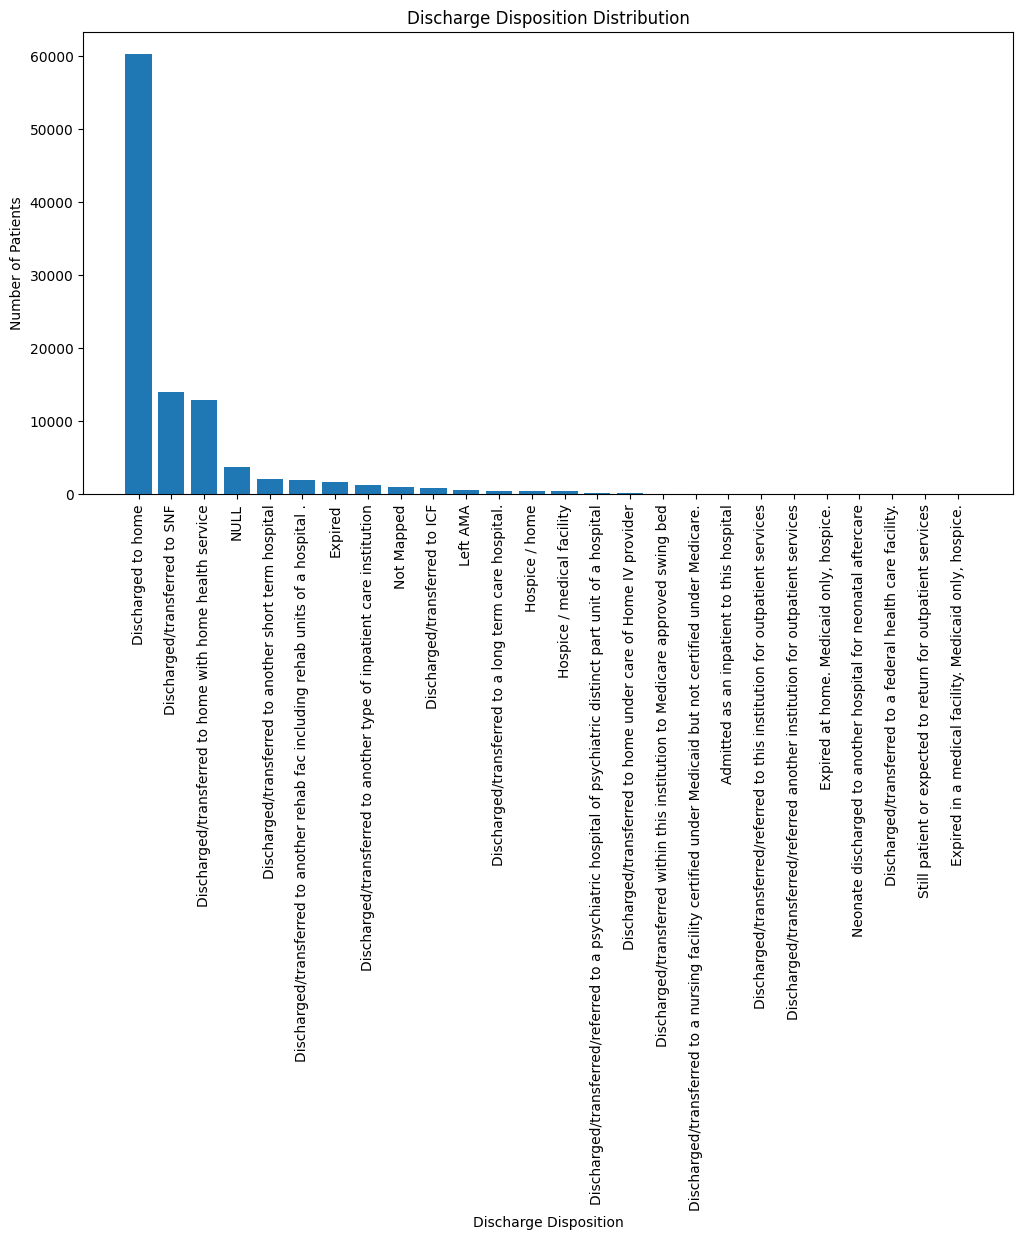

In [ ]:
# Define the dictionary mapping discharge disposition id to its meaning
discharge_disposition_dict = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital .',
    23: 'Discharged/transferred to a long term care hospital.',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    27: 'Discharged/transferred to a federal health care facility.',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH).',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
}

# Replace discharge disposition id with their meanings
dataset['discharge_disposition_id'] = dataset['discharge_disposition_id'].replace(discharge_disposition_dict)

# Count the number of patients per discharge disposition and print it out
patient_counts = dataset['discharge_disposition_id'].value_counts()
print(patient_counts)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(patient_counts.index, patient_counts.values, color='#1f77b4')
plt.xticks(rotation=90)
plt.xlabel('Discharge Disposition')
plt.ylabel('Number of Patients')
plt.title('Discharge Disposition Distribution')
plt.show()




Exact number:
Emergency Room                                               57494
Physician Referral                                           29565
NULL                                                          6781
Transfer from hospital                                        3187
Transfer from another healthcare facility                     2264
Clinic Referral                                               1104
Transfer from SNF                                              855
HMO Referral                                                   187
Not Mapped                                                     161
Not Available                                                  125
Court/Law Enforcement                                           16
Transfer from hospital inpt/same fac reslt in a sep claim       12
Transfer from critical access hospital                           8
Extramural Birth                                                 2
Normal Delivery                               

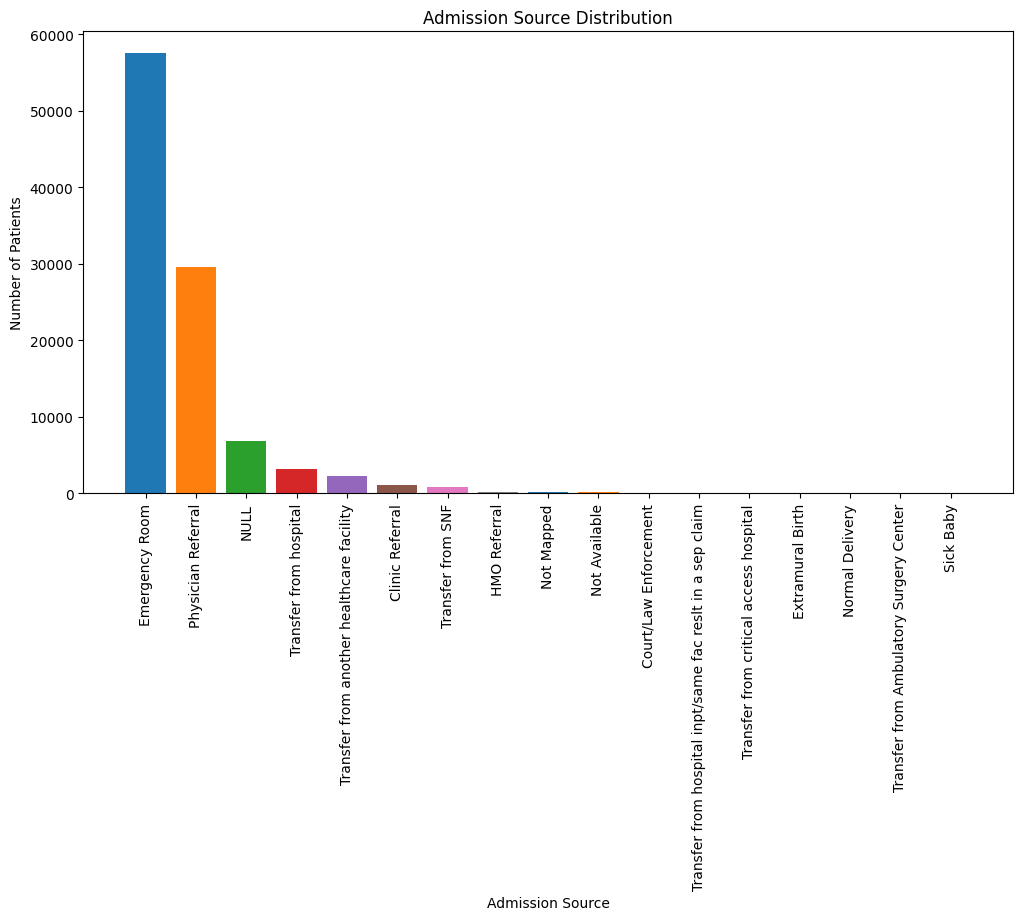

In [ ]:
print("\n\nExact number:")
# Define the dictionary mapping admission source id to its meaning
admission_source_dict = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from hospital',
    5: 'Transfer from SNF',
    6: 'Transfer from another healthcare facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critical access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer from another home health agency',
    19: 'Readmission to same home health agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

# Replace admission source id with their meanings
dataset['admission_source_id'] = dataset['admission_source_id'].replace(admission_source_dict)

# Count the number of patients per admission source and print it out
patient_counts = dataset['admission_source_id'].value_counts()
print(patient_counts)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(patient_counts.index, patient_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.xticks(rotation=90)
plt.xlabel('Admission Source')
plt.ylabel('Number of Patients')
plt.title('Admission Source Distribution')
plt.show()




DATA PRE-PROCESSING

In [ ]:
# load dataset
dataset = pd.read_csv(dataset_path)

i = 1000000
while i>10000:
  # count "?" in each column
  counts = (dataset == '?').sum()

  # select column with the highest count
  column_with_most_missing_values = counts.idxmax()

  # print the result
  print(f"The column with the most missing values is {column_with_most_missing_values} with {counts[column_with_most_missing_values]} missing values.")
  dataset = dataset.drop(columns=column_with_most_missing_values)
  i = counts[column_with_most_missing_values]


The column with the most missing values is weight with 98569 missing values.
The column with the most missing values is medical_specialty with 49949 missing values.
The column with the most missing values is payer_code with 40256 missing values.
The column with the most missing values is race with 2273 missing values.


In [ ]:
# load dataset
dataset = pd.read_csv(dataset_path)

# Remove the specified columns
columns_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
dataset = dataset.drop(columns=columns_to_drop)
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

dataset = dataset.replace('?', np.nan)  # Replace '?' with NaN values
dataset['diag_1'] = pd.to_numeric(dataset['diag_1'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_2'] = pd.to_numeric(dataset['diag_2'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_3'] = pd.to_numeric(dataset['diag_3'], errors='coerce') # replace non numerical value with NaN values
dataset = dataset.dropna()  # Drop rows with NaN values
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

# Keep only the rows where the value for 'admission_type_id' is 1, 2, or 3
dataset = dataset[dataset['admission_type_id'].isin([1, 2, 3])]
# Keep only the rows where the value for 'discharge_disposition_id' is 1, 3, or 7
dataset = dataset[dataset['discharge_disposition_id'].isin([1, 3, 6])]
# Keep only the rows where the value for 'admission_source_id' is 1 or 7
dataset = dataset[dataset['admission_source_id'].isin([1,7])]

dataset = dataset.drop(['admission_type_id', 'discharge_disposition_id','admission_source_id'], axis=1)

num_rows = dataset.shape[0]
print("(after selection) Number of rows:", num_rows)

dataset['num_lab_procedures'] = dataset['num_lab_procedures'].astype(float)
dataset['diag_1'] = dataset['diag_1'].astype(float)
dataset['diag_2'] = dataset['diag_2'].astype(float)
dataset['diag_3'] = dataset['diag_3'].astype(float)
dataset['number_diagnoses'] = dataset['number_diagnoses'].astype(float)
mapping = {'No': 0, 'Yes': 1}
dataset['diabetesMed'] = dataset['diabetesMed'].replace(mapping).astype(float)

# One-hot encode string columns
dataset_one_hot_encoding = pd.get_dummies(dataset, columns=['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'])
num_rows = dataset_one_hot_encoding.shape[0]
num_cols = dataset_one_hot_encoding.shape[1]
print("Number of rows/cols:", num_rows,"x",num_cols)

# Define the target variable
target = 'diabetesMed'

# Compute the correlation matrix
corr_matrix = dataset_one_hot_encoding.corr(method='spearman')

# Select the top k features with the highest correlation coefficients with the target variable
k = 30
top_features = corr_matrix[target].abs().nlargest(k).index

# Assuming top_features is the list of columns you want to keep
dataset_corr_one_hot_encoding = dataset_one_hot_encoding.loc[:, top_features]
num_rows = dataset_corr_one_hot_encoding.shape[0]
print("Number of rows:", num_rows)
print(dataset_corr_one_hot_encoding.head())

Number of rows: 101766
Number of rows: 89782
(after selection) Number of rows: 63685
Number of rows/cols: 63685 x 105
Number of rows: 63685
    diabetesMed  insulin_No  change_Ch  change_No  insulin_Steady  \
1           1.0           0          1          0               0   
3           1.0           0          1          0               0   
4           1.0           0          1          0               1   
7           1.0           1          0          1               0   
10          1.0           0          0          1               1   

    metformin_No  metformin_Steady  insulin_Down  glipizide_No  \
1              1                 0             0             1   
3              1                 0             0             1   
4              1                 0             0             0   
7              1                 0             0             1   
10             1                 0             0             1   

    glipizide_Steady  ...  A1Cresult_None  repag

In [ ]:
# Create a MinMaxScaler object
scaler_corr_one_hot_encoding = MinMaxScaler()

# Normalize all columns in the dataframe
df_normalized_corr_one_hot_encoding = pd.DataFrame(scaler_corr_one_hot_encoding.fit_transform(dataset_corr_one_hot_encoding), columns=dataset_corr_one_hot_encoding.columns)

(Dataset of just removing the ?)


In [ ]:
# load dataset
dataset = pd.read_csv(dataset_path)

# Remove the specified columns
columns_to_drop = ['encounter_id', 'patient_nbr','weight','payer_code','medical_specialty',]
dataset = dataset.drop(columns=columns_to_drop)
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

dataset = dataset.replace('?', np.nan)  # Replace '?' with NaN values
dataset['diag_1'] = pd.to_numeric(dataset['diag_1'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_2'] = pd.to_numeric(dataset['diag_2'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_3'] = pd.to_numeric(dataset['diag_3'], errors='coerce') # replace non numerical value with NaN values
dataset = dataset.dropna()  # Drop rows with NaN values
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

dataset.loc[:, ['diag_1', 'diag_2', 'diag_3']] = dataset.loc[:, ['diag_1', 'diag_2', 'diag_3']].astype(float)
mapping = {'No': 0, 'Yes': 1}
dataset['diabetesMed'] = dataset['diabetesMed'].replace(mapping).astype(float)

# One-hot encode string columns
dataset_full_one_hot_encoding = pd.get_dummies(dataset, columns=['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'])
num_rows = dataset_one_hot_encoding.shape[0]
num_cols = dataset_one_hot_encoding.shape[1]
print("Number of rows/cols:", num_rows,"x",num_cols)

# Define the target variable
target = 'diabetesMed'

# Compute the correlation matrix
corr_matrix = dataset_full_one_hot_encoding.corr()

# Select the top k features with the highest correlation coefficients with the target variable
k = 30
top_features = corr_matrix[target].abs().nlargest(k).index

# Assuming top_features is the list of columns you want to keep
dataset_full_corr_one_hot_encoding = dataset_full_one_hot_encoding.loc[:, top_features]
num_rows = dataset_full_corr_one_hot_encoding.shape[0]
print("Number of rows:", num_rows)
print(dataset_full_corr_one_hot_encoding.head())

Number of rows: 101766
Number of rows: 89782


<ipython-input-12-163e74feec9a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, ['diag_1', 'diag_2', 'diag_3']] = dataset.loc[:, ['diag_1', 'diag_2', 'diag_3']].astype(float)


Number of rows/cols: 63685 x 105
Number of rows: 89782
   diabetesMed  insulin_No  change_Ch  change_No  insulin_Steady  \
1          1.0           0          1          0               0   
3          1.0           0          1          0               0   
4          1.0           0          1          0               1   
5          1.0           0          0          1               1   
7          1.0           1          0          1               0   

   metformin_No  metformin_Steady  glipizide_No  insulin_Down  insulin_Up  \
1             1                 0             1             0           1   
3             1                 0             1             0           1   
4             1                 0             0             0           0   
5             1                 0             1             0           0   
7             1                 0             1             0           0   

   ...  A1Cresult_>8  repaglinide_No  A1Cresult_None  repaglinide_Steady 

In [ ]:
# Create a MinMaxScaler object
scaler_full_corr_one_hot_encoding = MinMaxScaler()

# Normalize all columns in the dataframe
df_normalized_full_corr_one_hot_encoding = pd.DataFrame(scaler_corr_one_hot_encoding.fit_transform(dataset_full_corr_one_hot_encoding), columns=dataset_full_corr_one_hot_encoding.columns)

TRAINING



In [ ]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(Logistic Regression)

In [ ]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9990578629190547
Precision: 1.0
Recall: 0.9987834549878345
F1 Score: 0.9993913572732805
Confusion Matrix: [[2873    0]
 [  12 9852]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2873
           1       1.00      1.00      1.00      9864

    accuracy                           1.00     12737
   macro avg       1.00      1.00      1.00     12737
weighted avg       1.00      1.00      1.00     12737



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(Decision Tree)

In [ ]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Create a Decision Tree object
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9989793514956427
Precision: 1.0
Recall: 0.998690440213559
F1 Score: 0.9993447910891589
Confusion Matrix: [[2810    0]
 [  13 9914]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00      9927

    accuracy                           1.00     12737
   macro avg       1.00      1.00      1.00     12737
weighted avg       1.00      1.00      1.00     12737



(Random Forests)

In [ ]:
# Create a Random Forests object with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9989793514956427
Confusion Matrix:
[[2863    0]
 [  13 9861]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2863
           1       1.00      1.00      1.00      9874

    accuracy                           1.00     12737
   macro avg       1.00      1.00      1.00     12737
weighted avg       1.00      1.00      1.00     12737



(SVM)

In [ ]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Create an SVM object
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9992148857658789
Confusion Matrix:
[[2791    0]
 [  10 9936]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00      9946

    accuracy                           1.00     12737
   macro avg       1.00      1.00      1.00     12737
weighted avg       1.00      1.00      1.00     12737



(Gradient Boosting Machines)

In [ ]:
# Create a Gradient Boosting object
gbm = GradientBoostingClassifier()

# Train the model on the training data
gbm.fit(X_train, y_train)

# Predict on the testing data
y_pred = gbm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9988223286488184
Confusion Matrix:
[[2863    0]
 [  15 9859]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2863
           1       1.00      1.00      1.00      9874

    accuracy                           1.00     12737
   macro avg       1.00      1.00      1.00     12737
weighted avg       1.00      1.00      1.00     12737



(DEEP LEARNING)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001), metrics=['accuracy']) # binary crossentropy


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)


Epoch 1/10
797/797 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9420
Epoch 2/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0161 - accuracy: 0.9971
Epoch 3/10
797/797 [==============================] - 3s 4ms/step - loss: 0.0145 - accuracy: 0.9990
Epoch 4/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9807
Epoch 5/10
797/797 [==============================] - 2s 2ms/step - loss: 0.0146 - accuracy: 0.9908
Epoch 6/10
797/797 [==============================] - 2s 2ms/step - loss: 0.0133 - accuracy: 0.9837
Epoch 7/10
797/797 [==============================] - 2s 2ms/step - loss: 0.0126 - accuracy: 0.9847
Epoch 8/10
797/797 [==============================] - 2s 2ms/step - loss: 0.0126 - accuracy: 0.9847
Epoch 9/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0127 - accuracy: 0.9841
Epoch 10/10
797/797 [==============================] - 3s 4ms/step - loss: 0.0127 - accuracy: 0.9843

In [ ]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")



399/399 [==============================] - 1s 2ms/step
Test Loss: [0.001720806467346847, 0.9987438321113586]
Test Accuracy: 0.9987438172254063




Epochs_param optimization

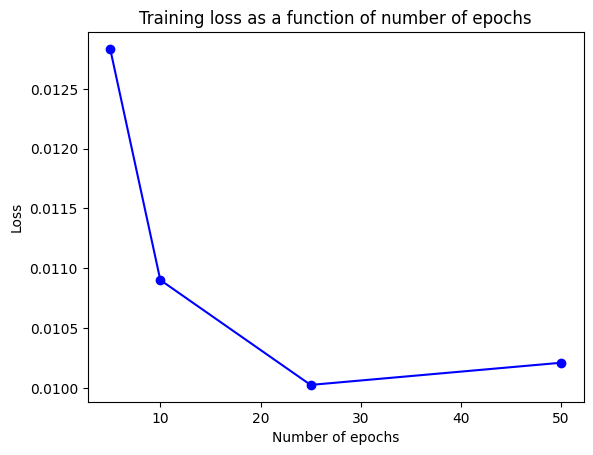

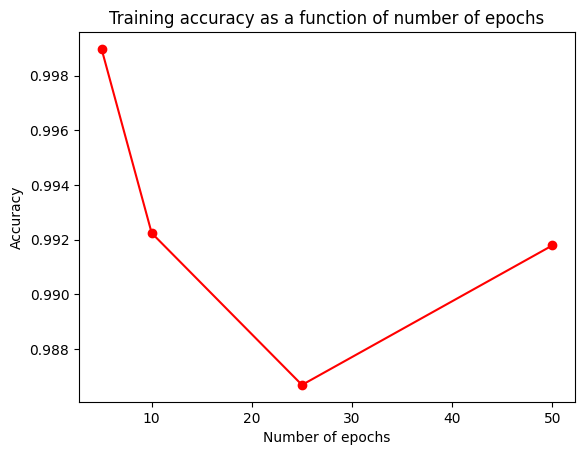

In [ ]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_epochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_epochs_list = [5, 10, 25, 50]
loss_list = []
accuracy_list = []
for n_epochs in n_epochs_list:
    history = train_model(n_epochs)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_epochs_list, loss_list, 'bo-')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of epochs')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_epochs_list, accuracy_list, 'ro-')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of epochs')


plt.show()

Batch size optimisation

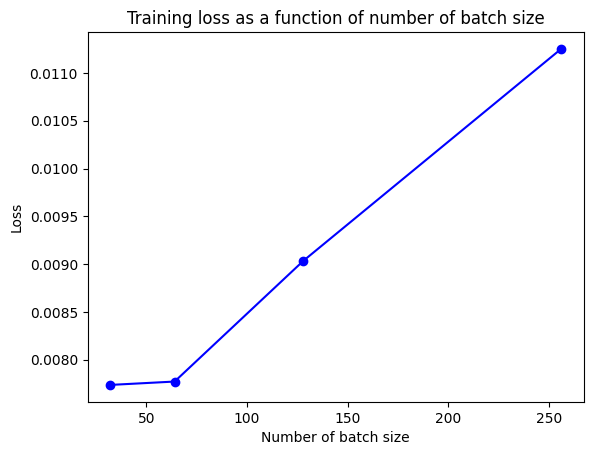

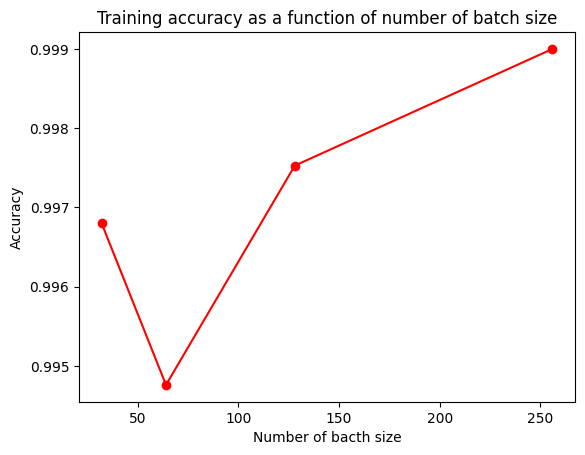

In [ ]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_en_batchpochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=n_batch, verbose=0)
    return history

# Train a series of models with varying numbers of batch size
n_batch_list = [32, 64, 128, 256]
loss_list = []
accuracy_list = []
for n_batch in n_batch_list:
    history = train_model(n_batch)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_batch_list, loss_list, 'bo-')
plt.xlabel('Number of batch size')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of batch size')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_batch_list, accuracy_list, 'ro-')
plt.xlabel('Number of bacth size')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of batch size')


plt.show()

LEARNING RATE

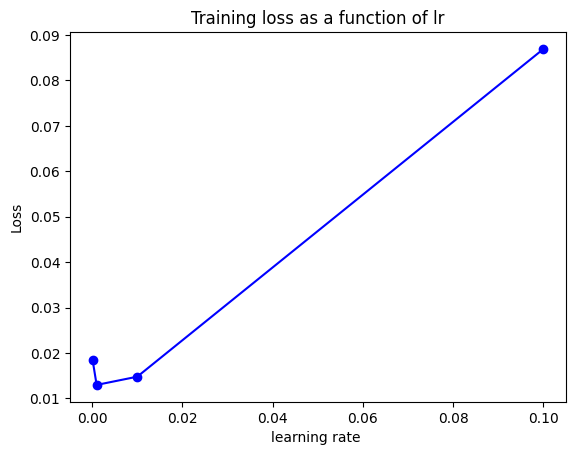

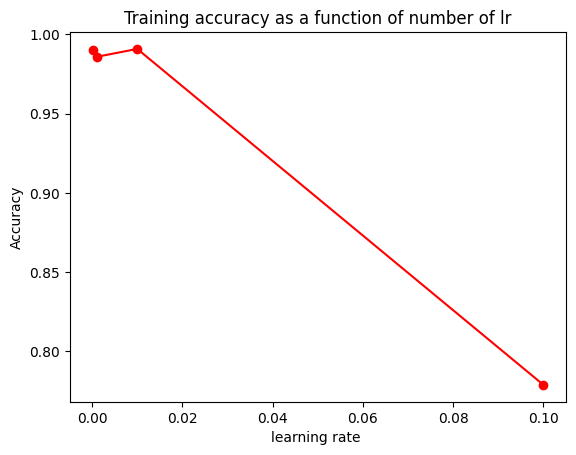

In [ ]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_lr):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=n_lr), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_lr_list = [0.0001, 0.001, 0.01, 0.1]
loss_list = []
accuracy_list = []
for n_lr in n_lr_list:
    history = train_model(n_lr)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])

# Plot the loss as a function of number of epochs
plt.plot(n_lr_list, loss_list, 'bo-')
plt.xlabel('learning rate ')
plt.ylabel('Loss')
plt.title('Training loss as a function of lr')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_lr_list, accuracy_list, 'ro-')
plt.xlabel('learning rate ')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of lr')


plt.show()

FINAL MODEL

In [ ]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001))

In [ ]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
1593/1593 [==============================] - 4s 2ms/step - loss: 0.0228
Epoch 2/50
1593/1593 [==============================] - 5s 3ms/step - loss: 0.0103
Epoch 3/50
1593/1593 [==============================] - 4s 2ms/step - loss: 0.0101
Epoch 4/50
1593/1593 [==============================] - 4s 2ms/step - loss: 0.0101
Epoch 5/50
1593/1593 [==============================] - 4s 2ms/step - loss: 0.0101
Epoch 6/50
1593/1593 [==============================] - 5s 3ms/step - loss: 0.0099
Epoch 7/50
1593/1593 [==============================] - 3s 2ms/step - loss: 0.0100
Epoch 8/50
1593/1593 [==============================] - 3s 2ms/step - loss: 0.0099
Epoch 9/50
1593/1593 [==============================] - 4s 3ms/step - loss: 0.0100
Epoch 10/50
1593/1593 [==============================] - 4s 3ms/step - loss: 0.0099
Epoch 11/50
1593/1593 [==============================] - 3s 2ms/step - loss: 0.0098
Epoch 12/50
1593/1593 [==============================] - 4s 2ms/step - loss: 0.0100
E

In [ ]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")


399/399 [==============================] - 1s 3ms/step
Test Loss: 0.0015776677755638957
Test Accuracy: 0.9987438172254063




(K-means)

In [ ]:
from sklearn.cluster import KMeans

# Instantiate the KMeans class with desired number of clusters
kmeans = KMeans(n_init='auto',n_clusters=2, random_state=42,max_iter=300)

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centroids = kmeans.cluster_centers_


In [ ]:
# Predict clusters for the testing data
y_pred = kmeans.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5208447829159143
Precision: 0.8031837916063675
Recall: 0.5058740125582337
F1-score: 0.6207667930155968


(FULL DATASET)


In [ ]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(Logistic Regression)

In [ ]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9950437155426853
Precision: 1.0
Recall: 0.9935740072202166
F1 Score: 0.9967766469885191
Confusion Matrix: [[ 4107     0]
 [   89 13761]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4107
           1       1.00      0.99      1.00     13850

    accuracy                           1.00     17957
   macro avg       0.99      1.00      0.99     17957
weighted avg       1.00      1.00      1.00     17957



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(Decision Tree)

In [ ]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Create a Decision Tree object
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9951550927215014
Precision: 0.9998532433225712
Recall: 0.9938005980599519
F1 Score: 0.9968177329090311
Confusion Matrix: [[ 4244     2]
 [   85 13626]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4246
           1       1.00      0.99      1.00     13711

    accuracy                           1.00     17957
   macro avg       0.99      1.00      0.99     17957
weighted avg       1.00      1.00      1.00     17957



(Random Forests)

In [ ]:
# Create a Random Forests object with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9957676672049897
Confusion Matrix:
[[ 4118     3]
 [   73 13763]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4121
           1       1.00      0.99      1.00     13836

    accuracy                           1.00     17957
   macro avg       0.99      1.00      0.99     17957
weighted avg       1.00      1.00      1.00     17957



(SVM)

In [ ]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)


# Create an SVM object
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9953221584897255
Confusion Matrix:
[[ 4090     0]
 [   84 13783]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4090
           1       1.00      0.99      1.00     13867

    accuracy                           1.00     17957
   macro avg       0.99      1.00      0.99     17957
weighted avg       1.00      1.00      1.00     17957



(Gradient Boosting Machines)

In [ ]:
# Create a Gradient Boosting object
gbm = GradientBoostingClassifier()

# Train the model on the training data
gbm.fit(X_train, y_train)

# Predict on the testing data
y_pred = gbm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9958790443838058
Confusion Matrix:
[[ 4121     0]
 [   74 13762]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4121
           1       1.00      0.99      1.00     13836

    accuracy                           1.00     17957
   macro avg       0.99      1.00      0.99     17957
weighted avg       1.00      1.00      1.00     17957



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001), metrics=['accuracy']) # binary crossentropy


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)


Epoch 1/10
1123/1123 [==============================] - 4s 2ms/step - loss: 0.0199 - accuracy: 0.9745
Epoch 2/10
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0086 - accuracy: 0.9954
Epoch 3/10
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0080 - accuracy: 0.9950
Epoch 4/10
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0078 - accuracy: 0.9937
Epoch 5/10
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0074 - accuracy: 0.9947
Epoch 6/10
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0072 - accuracy: 0.9950
Epoch 7/10
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0073 - accuracy: 0.9949
Epoch 8/10
1123/1123 [==============================] - 4s 4ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 9/10
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 10/10
1123/1123 [==============================] - 3s 2ms/step - loss: 0.007

In [ ]:

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")

562/562 [==============================] - 1s 1ms/step
Test Loss: [0.0028709429316222668, 0.9950436949729919]
Test Accuracy: 0.9950437155426853




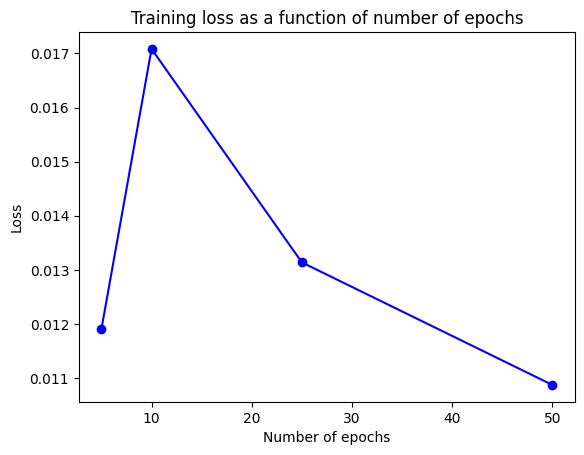

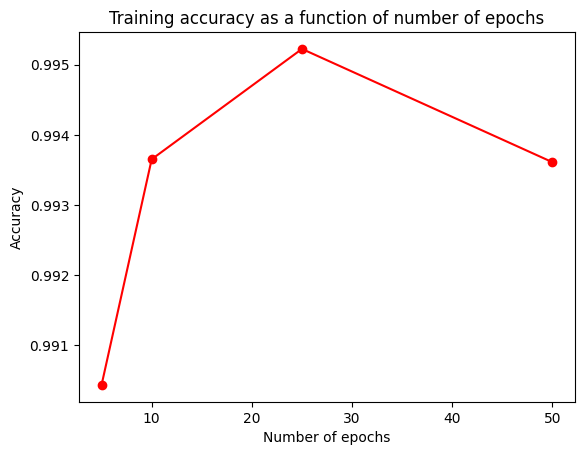

In [ ]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_epochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_epochs_list = [5, 10, 25, 50]
loss_list = []
accuracy_list = []
for n_epochs in n_epochs_list:
    history = train_model(n_epochs)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_epochs_list, loss_list, 'bo-')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of epochs')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_epochs_list, accuracy_list, 'ro-')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of epochs')


plt.show()

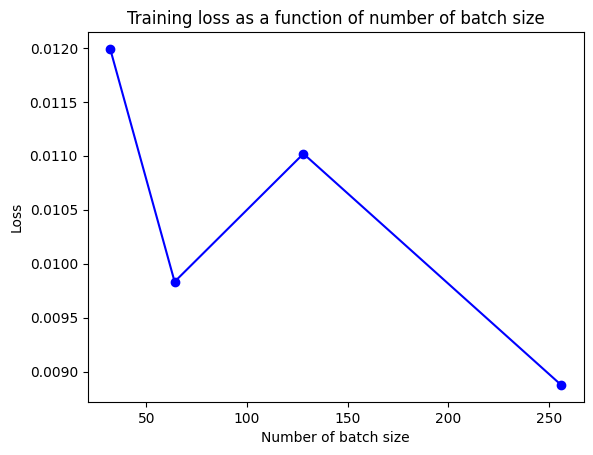

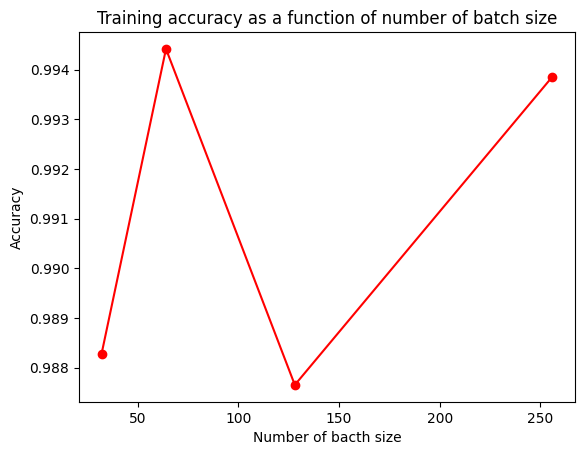

In [ ]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_en_batchpochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=n_batch, verbose=0)
    return history

# Train a series of models with varying numbers of batch size
n_batch_list = [32, 64, 128, 256]
loss_list = []
accuracy_list = []
for n_batch in n_batch_list:
    history = train_model(n_batch)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_batch_list, loss_list, 'bo-')
plt.xlabel('Number of batch size')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of batch size')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_batch_list, accuracy_list, 'ro-')
plt.xlabel('Number of bacth size')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of batch size')


plt.show()

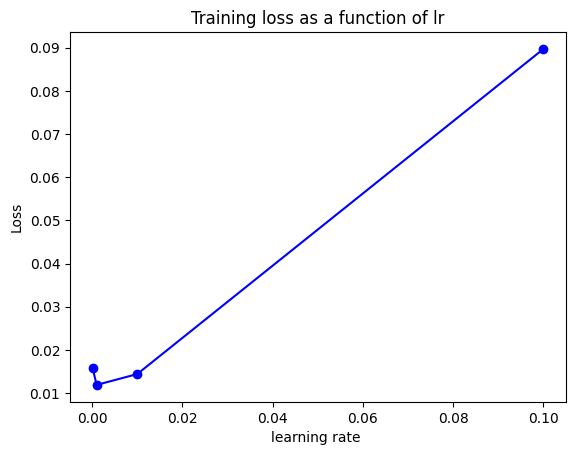

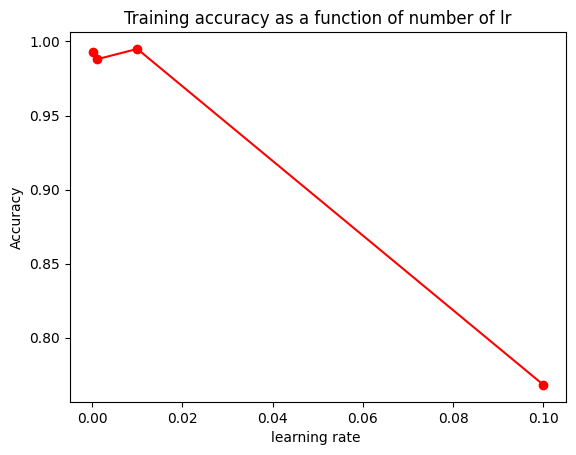

In [ ]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_lr):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=n_lr), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_lr_list = [0.0001, 0.001, 0.01, 0.1]
loss_list = []
accuracy_list = []
for n_lr in n_lr_list:
    history = train_model(n_lr)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])

# Plot the loss as a function of number of epochs
plt.plot(n_lr_list, loss_list, 'bo-')
plt.xlabel('learning rate ')
plt.ylabel('Loss')
plt.title('Training loss as a function of lr')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_lr_list, accuracy_list, 'ro-')
plt.xlabel('learning rate ')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of lr')


plt.show()

In [ ]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001))



In [ ]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
281/281 [==============================] - 2s 5ms/step - loss: 0.0709
Epoch 2/50
281/281 [==============================] - 1s 4ms/step - loss: 0.0254
Epoch 3/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0200
Epoch 4/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0177
Epoch 5/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0168
Epoch 6/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0165
Epoch 7/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0163
Epoch 8/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0164
Epoch 9/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0164
Epoch 10/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0162
Epoch 11/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0163
Epoch 12/50
281/281 [==============================] - 1s 3ms/step - loss: 0.0163
Epoch 13/50
281/281 [====

In [ ]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")

562/562 [==============================] - 1s 2ms/step
Test Loss: 0.003986936993896961
Test Accuracy: 0.9959347329732138


